In [101]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [3]:
file = pd.read_csv('Dataset.csv',encoding='latin-1')

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1302 non-null   object 
 12  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
file["Price"] = 1.01*file["Price"]

In [6]:
file.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1353.0869
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,907.9294
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,580.7500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2562.8245
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1821.6360


In [7]:
file.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
file.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [9]:
file.dropna(subset=['Weight'], inplace=True)

In [10]:
file.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
file.duplicated().sum()

0

In [12]:
file['Ram'] = file['Ram'].str.replace('GB','')
file['Weight'] = file['Weight'].str.replace('kg','')
file['Ram']=file['Ram'].astype('int64')
file['Weight'] = file['Weight'].astype('float64')

In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   Product           1302 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1302 non-null   object 
 6   Cpu               1302 non-null   object 
 7   Ram               1302 non-null   int64  
 8   Memory            1302 non-null   object 
 9   Gpu               1302 non-null   object 
 10  OpSys             1302 non-null   object 
 11  Weight            1302 non-null   float64
 12  Price             1302 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 142.4+ KB


/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/4259984979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(file['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

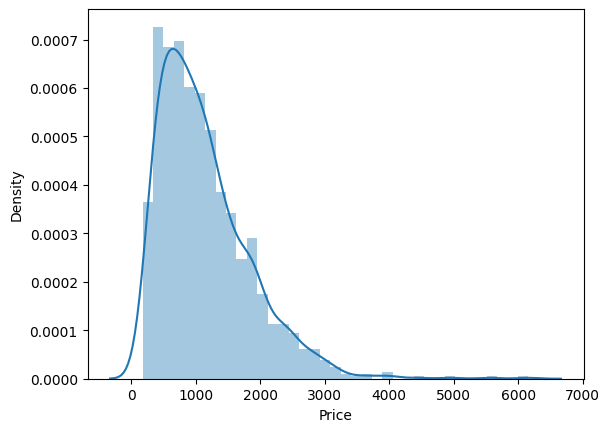

In [14]:
sb.distplot(file['Price'])

<AxesSubplot: >

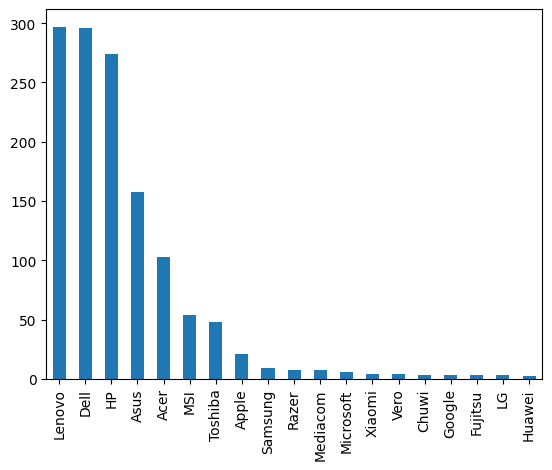

In [15]:
file["Company"].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Gpu', ylabel='Price'>

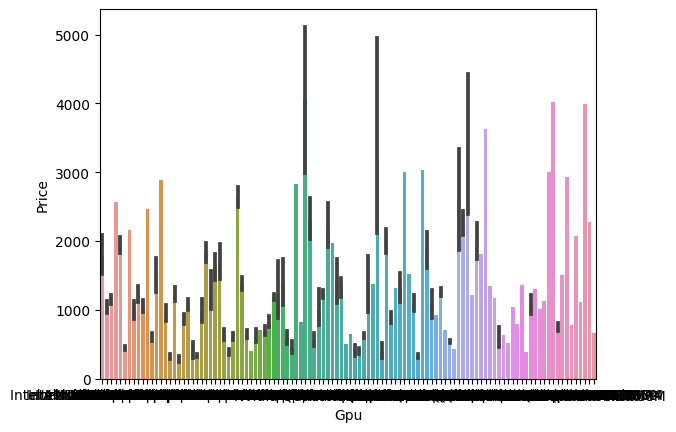

In [16]:
sb.barplot(x=file['Gpu'],y=file['Price'])

/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/463086934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(file['Inches'])


<AxesSubplot: xlabel='Inches', ylabel='Density'>

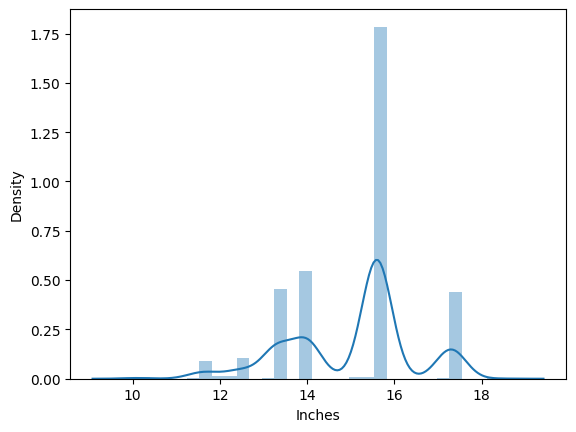

In [17]:
sb.distplot(file['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

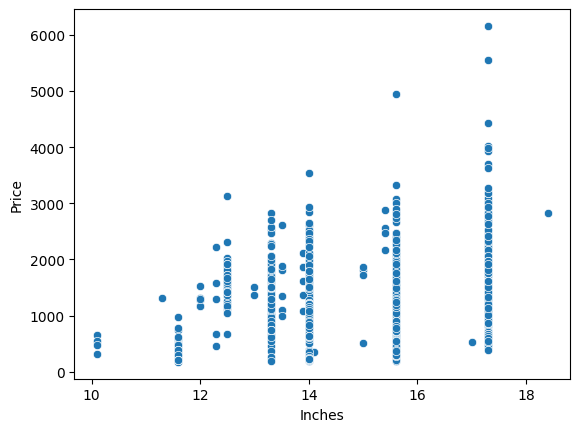

In [18]:
sb.scatterplot(x=file['Inches'],y=file['Price'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

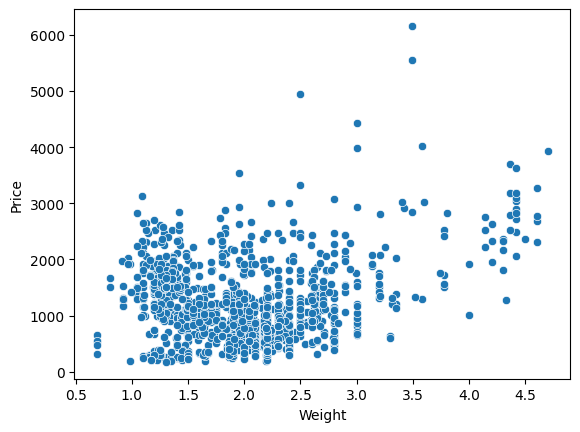

In [19]:
sb.scatterplot(x=file['Weight'],y=file['Price'])

<AxesSubplot: xlabel='ScreenResolution', ylabel='Price'>

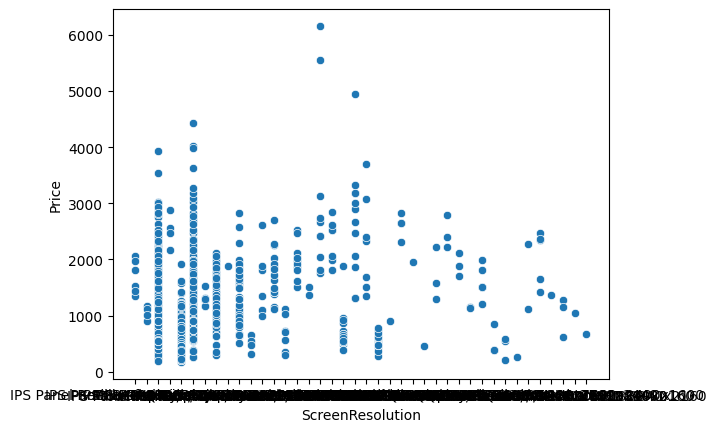

In [20]:
sb.scatterplot(x=file['ScreenResolution'],y=file['Price'])

In [21]:
file.corr()['Price']

/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/1689483292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  file.corr()['Price']


laptop_ID    0.067348
Inches       0.067836
Ram          0.743038
Weight       0.210206
Price        1.000000
Name: Price, dtype: float64

/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/1406973838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(file.corr())


<AxesSubplot: >

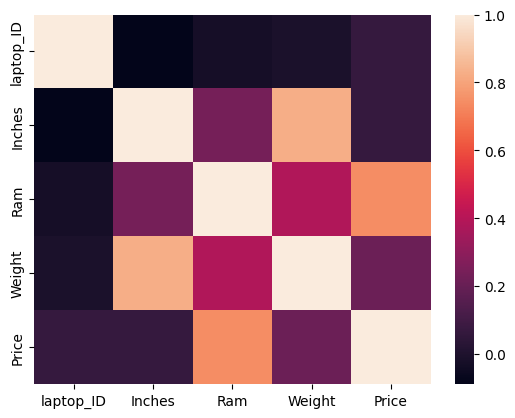

In [22]:
sb.heatmap(file.corr())

In [23]:
file.drop(columns=['laptop_ID'],inplace=True)

In [24]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   Product           1302 non-null   object 
 2   TypeName          1302 non-null   object 
 3   Inches            1302 non-null   float64
 4   ScreenResolution  1302 non-null   object 
 5   Cpu               1302 non-null   object 
 6   Ram               1302 non-null   int64  
 7   Memory            1302 non-null   object 
 8   Gpu               1302 non-null   object 
 9   OpSys             1302 non-null   object 
 10  Weight            1302 non-null   float64
 11  Price             1302 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 132.2+ KB


In [25]:
file.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360


In [26]:
file.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1012,HP,Elitebook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,1605.90
151,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,907.99
649,Lenovo,Thinkpad X270,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1599.84
404,MSI,GE73VR 7RF,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,2271.49
1025,HP,Elitebook 820,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,1574.59


In [27]:
file.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,644.38
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1513.99
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,231.29
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,771.64
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,372.69


In [28]:
file['Touch_Screen Type']=file['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [29]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   Product            1302 non-null   object 
 2   TypeName           1302 non-null   object 
 3   Inches             1302 non-null   float64
 4   ScreenResolution   1302 non-null   object 
 5   Cpu                1302 non-null   object 
 6   Ram                1302 non-null   int64  
 7   Memory             1302 non-null   object 
 8   Gpu                1302 non-null   object 
 9   OpSys              1302 non-null   object 
 10  Weight             1302 non-null   float64
 11  Price              1302 non-null   float64
 12  Touch_Screen Type  1302 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 142.4+ KB


In [30]:
file.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360,0


In [31]:
file.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,644.38,1
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1513.99,1
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,231.29,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,771.64,0
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,372.69,0


In [32]:
file['IPS'] = file['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [33]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   Product            1302 non-null   object 
 2   TypeName           1302 non-null   object 
 3   Inches             1302 non-null   float64
 4   ScreenResolution   1302 non-null   object 
 5   Cpu                1302 non-null   object 
 6   Ram                1302 non-null   int64  
 7   Memory             1302 non-null   object 
 8   Gpu                1302 non-null   object 
 9   OpSys              1302 non-null   object 
 10  Weight             1302 non-null   float64
 11  Price              1302 non-null   float64
 12  Touch_Screen Type  1302 non-null   int64  
 13  IPS                1302 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 152.6+ KB


In [34]:
file.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360,0,1


In [35]:
def splitCpuName(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [36]:
file['BrandName_Cpu']=file['Cpu'].apply(lambda x:" ".join(x.split()[0:3])).apply(splitCpuName)

In [37]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   Product            1302 non-null   object 
 2   TypeName           1302 non-null   object 
 3   Inches             1302 non-null   float64
 4   ScreenResolution   1302 non-null   object 
 5   Cpu                1302 non-null   object 
 6   Ram                1302 non-null   int64  
 7   Memory             1302 non-null   object 
 8   Gpu                1302 non-null   object 
 9   OpSys              1302 non-null   object 
 10  Weight             1302 non-null   float64
 11  Price              1302 non-null   float64
 12  Touch_Screen Type  1302 non-null   int64  
 13  IPS                1302 non-null   int64  
 14  BrandName_Cpu      1302 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 162.8+ KB


In [38]:
file.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869,0,1,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294,0,0,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500,0,0,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245,0,1,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360,0,1,Intel Core i5


In [39]:
file.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
542,HP,Envy 13-AB020nr,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,1156.4500,0,1,Intel Core i7
1011,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,1554.3900,0,0,Intel Core i5
536,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,805.3841,0,0,Intel Core i5
863,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,No OS,2.50,1027.1700,0,1,Intel Core i5
534,Asus,ROG Strix,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,1665.4900,0,1,Intel Core i5


In [40]:
file.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,644.38,1,1,Intel Core i7
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1513.99,1,1,Intel Core i7
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,231.29,0,0,Other Intel Processor
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,771.64,0,0,Intel Core i7
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,372.69,0,0,Other Intel Processor


In [41]:
file.drop(columns=['Cpu','Product'],inplace=True)

In [42]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   ScreenResolution   1302 non-null   object 
 4   Ram                1302 non-null   int64  
 5   Memory             1302 non-null   object 
 6   Gpu                1302 non-null   object 
 7   OpSys              1302 non-null   object 
 8   Weight             1302 non-null   float64
 9   Price              1302 non-null   float64
 10  Touch_Screen Type  1302 non-null   int64  
 11  IPS                1302 non-null   int64  
 12  BrandName_Cpu      1302 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 142.4+ KB


In [43]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294,0,0,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360,0,1,Intel Core i5


In [44]:
file.tail()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,644.38,1,1,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1513.99,1,1,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,231.29,0,0,Other Intel Processor
1301,HP,Notebook,15.6,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,771.64,0,0,Intel Core i7
1302,Asus,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,372.69,0,0,Other Intel Processor


In [45]:
file.sample(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu
92,HP,Notebook,13.3,Full HD 1920x1080,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,1208.9700,0,0,Intel Core i7
438,Lenovo,Ultrabook,14.0,2560x1440,24,512GB SSD,Intel HD Graphics 620,Windows 10,1.32,2405.8200,0,0,Intel Core i7
1123,Dell,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics 520,Linux,2.09,528.8663,0,0,Intel Core i5
513,Dell,Notebook,15.6,Full HD 1920x1080,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,1231.4324,0,0,Intel Core i7
908,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,796.8900,0,1,Intel Core i5
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,1978.4890,0,1,Intel Core i5
327,Asus,Ultrabook,15.6,Full HD 1920x1080,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,1060.3990,0,0,Intel Core i7
546,Lenovo,Notebook,14.0,Full HD 1920x1080,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,792.8500,0,0,Intel Core i5
1162,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,907.9900,0,1,Intel Core i7
645,Lenovo,Notebook,14.0,1366x768,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.43,276.7400,0,0,Other Intel Processor


In [46]:
def splitGPU(text):
    if text == 'Intel':
        return text
    else:
        if text == 'Nvidia':
            return text
        else:
            return text

In [47]:
file['Gpu_Name']=file['Gpu'].apply(lambda x:" ".join(x.split()[0:1])).apply(splitGPU)

In [48]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1353.0869,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,907.9294,0,0,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,580.7500,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2562.8245,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1821.6360,0,1,Intel Core i5,Intel


In [49]:
file.drop(columns=['Gpu'],inplace=True)

In [50]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   ScreenResolution   1302 non-null   object 
 4   Ram                1302 non-null   int64  
 5   Memory             1302 non-null   object 
 6   OpSys              1302 non-null   object 
 7   Weight             1302 non-null   float64
 8   Price              1302 non-null   float64
 9   Touch_Screen Type  1302 non-null   int64  
 10  IPS                1302 non-null   int64  
 11  BrandName_Cpu      1302 non-null   object 
 12  Gpu_Name           1302 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 142.4+ KB


<AxesSubplot: xlabel='BrandName_Cpu', ylabel='Price'>

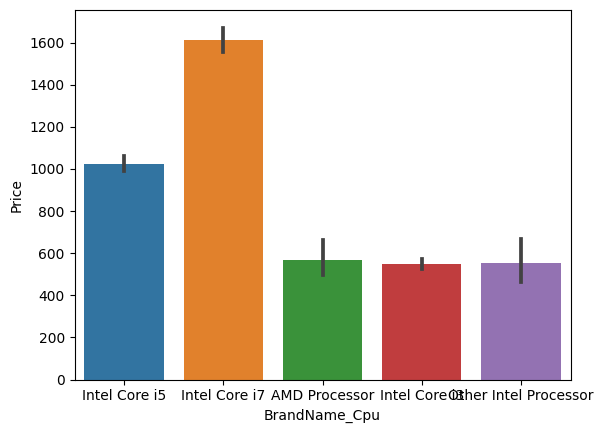

In [51]:
sb.barplot(x=file['BrandName_Cpu'],y=file['Price'])

<AxesSubplot: xlabel='Gpu_Name', ylabel='Price'>

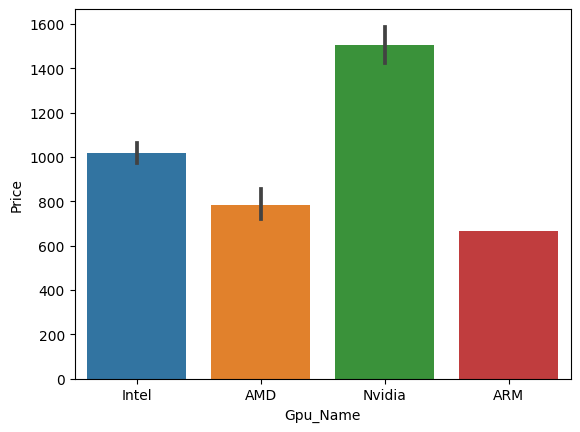

In [52]:
sb.barplot(x=file['Gpu_Name'],y=file['Price'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

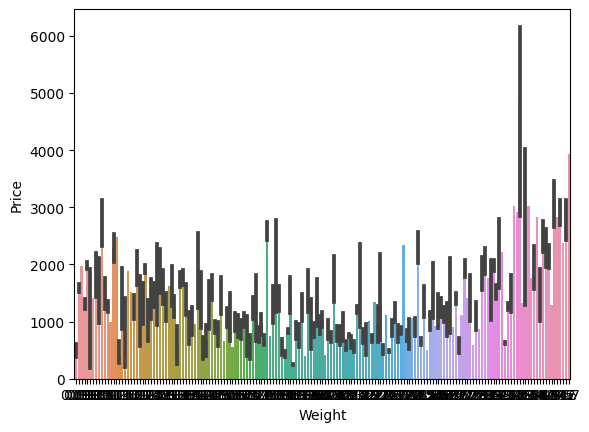

In [53]:
sb.barplot(x=file['Weight'],y=file['Price'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

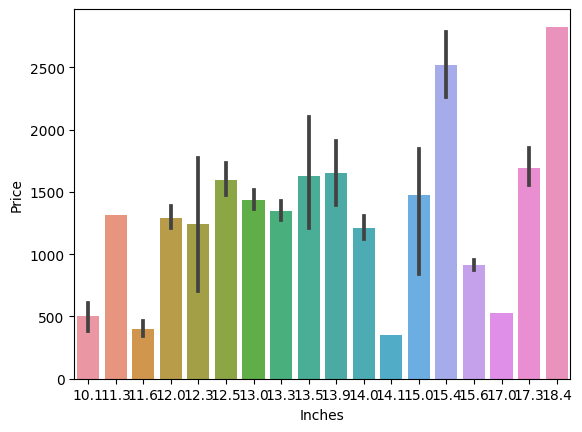

In [54]:
sb.barplot(x=file['Inches'],y=file['Price'])

<AxesSubplot: xlabel='IPS', ylabel='Price'>

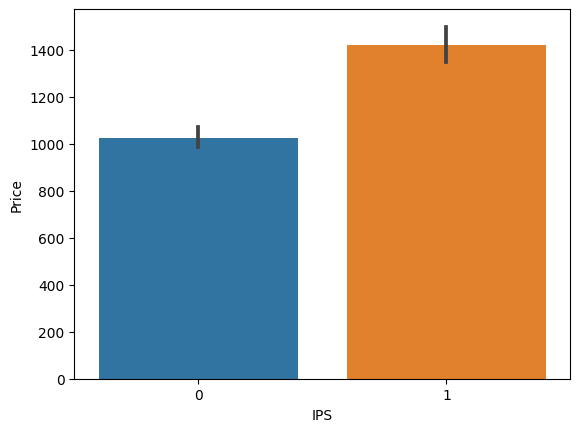

In [55]:
sb.barplot(x=file['IPS'],y=file['Price'])

<AxesSubplot: xlabel='Touch_Screen Type', ylabel='Price'>

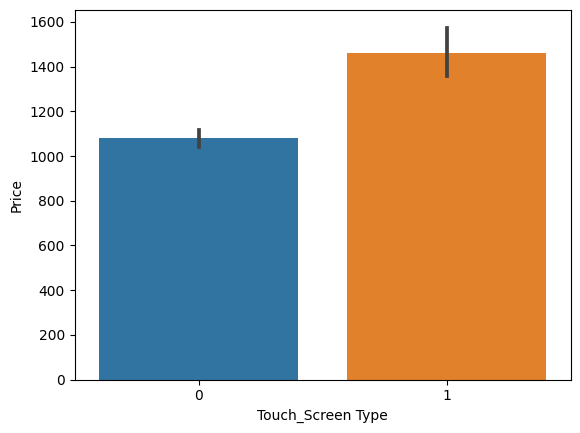

In [56]:
sb.barplot(x=file['Touch_Screen Type'],y=file['Price'])

<AxesSubplot: xlabel='Ram', ylabel='Price'>

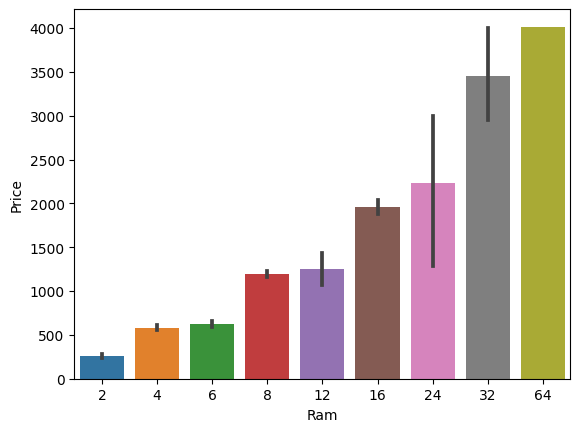

In [57]:
sb.barplot(x=file['Ram'],y=file['Price'])

<AxesSubplot: xlabel='Memory', ylabel='Price'>

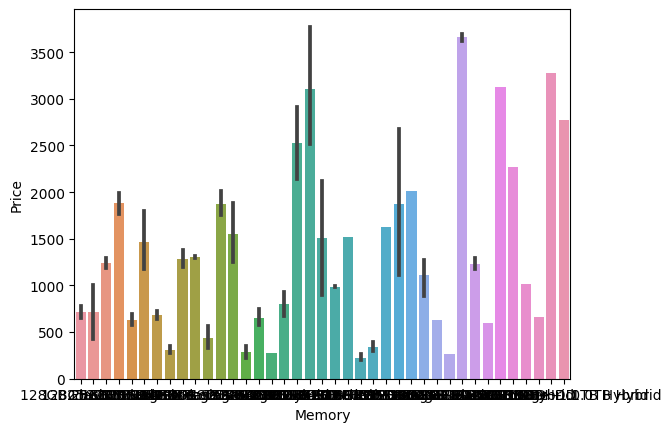

In [58]:
sb.barplot(x=file['Memory'],y=file['Price'])

<AxesSubplot: xlabel='OpSys', ylabel='Price'>

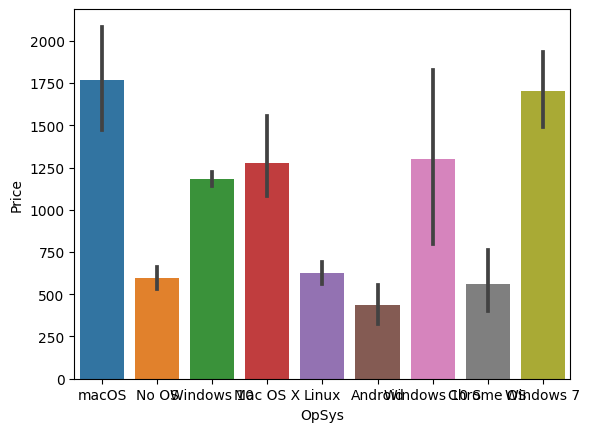

In [59]:
sb.barplot(x=file['OpSys'],y=file['Price'])

/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/1406973838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(file.corr())


<AxesSubplot: >

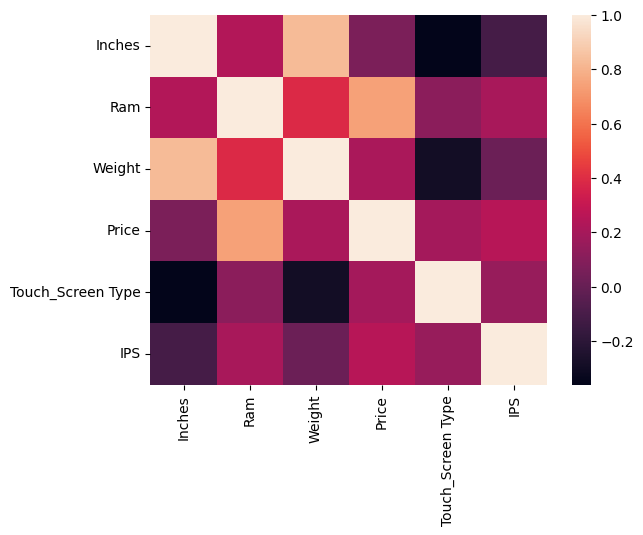

In [60]:
sb.heatmap(file.corr())

In [61]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1353.0869,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,907.9294,0,0,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,580.7500,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2562.8245,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1821.6360,0,1,Intel Core i5,Intel


In [62]:
def splitOpSys(val):
    if val == 'Windows 10' or val == 'Windows 7' or val == 'Windows 10 S':
        return 'Windows'
    else:
        if val == 'macOS' or val == 'Mac OS X' or val == "MacBook Pro" or val == "Macbook Air" or val == "MacBook 12":
            return 'Mac'
        else:
            return 'Others'

In [63]:
file['Operating_System'] = file['OpSys'].apply(splitOpSys)

In [64]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,1353.0869,0,1,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,907.9294,0,0,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,580.7500,0,0,Intel Core i5,Intel,Others
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,2562.8245,0,1,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,1821.6360,0,1,Intel Core i5,Intel,Mac


In [65]:
file.drop(columns=['OpSys'],inplace=True)

In [66]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   ScreenResolution   1302 non-null   object 
 4   Ram                1302 non-null   int64  
 5   Memory             1302 non-null   object 
 6   Weight             1302 non-null   float64
 7   Price              1302 non-null   float64
 8   Touch_Screen Type  1302 non-null   int64  
 9   IPS                1302 non-null   int64  
 10  BrandName_Cpu      1302 non-null   object 
 11  Gpu_Name           1302 non-null   object 
 12  Operating_System   1302 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 142.4+ KB


In [67]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,1.37,1353.0869,0,1,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,1.34,907.9294,0,0,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,1.86,580.7500,0,0,Intel Core i5,Intel,Others
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,1.83,2562.8245,0,1,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,1.37,1821.6360,0,1,Intel Core i5,Intel,Mac


/var/folders/5g/kgxr6fgn1gj0swczttj8zgh40000gn/T/ipykernel_22121/1406973838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(file.corr())


<AxesSubplot: >

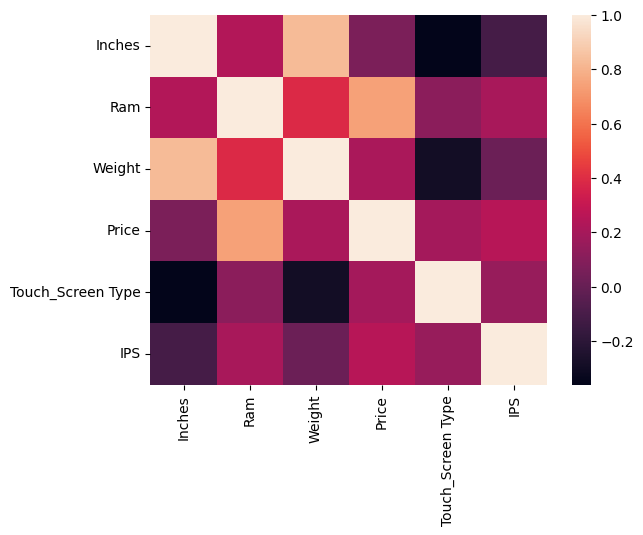

In [68]:
sb.heatmap(file.corr())

In [69]:
file["res1"] = file["ScreenResolution"].str.split('x',n=1,expand = True)[0]
file["res2"] = file["ScreenResolution"].str.split('x',n=1,expand=True)[1]

In [70]:
file.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System,res1,res2
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,1.37,1353.0869,0,1,Intel Core i5,Intel,Mac,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,1.34,907.9294,0,0,Intel Core i5,Intel,Mac,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,1.86,580.7500,0,0,Intel Core i5,Intel,Others,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,1.83,2562.8245,0,1,Intel Core i7,AMD,Mac,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,1.37,1821.6360,0,1,Intel Core i5,Intel,Mac,IPS Panel Retina Display 2560,1600


In [71]:
file['res1'] = file['res1'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
file.drop(columns=['ScreenResolution'],inplace=True)

In [72]:
file.head()
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   Ram                1302 non-null   int64  
 4   Memory             1302 non-null   object 
 5   Weight             1302 non-null   float64
 6   Price              1302 non-null   float64
 7   Touch_Screen Type  1302 non-null   int64  
 8   IPS                1302 non-null   int64  
 9   BrandName_Cpu      1302 non-null   object 
 10  Gpu_Name           1302 non-null   object 
 11  Operating_System   1302 non-null   object 
 12  res1               1302 non-null   object 
 13  res2               1302 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 152.6+ KB


In [73]:
X = file.drop(columns=['Price'])
Y = np.log(file['Price'])

In [74]:
X

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System,res1,res2
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,Intel Core i5,Intel,Mac,2560,1600
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,Intel Core i5,Intel,Mac,1440,900
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,Intel Core i5,Intel,Others,1920,1080
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,Intel Core i7,AMD,Mac,2880,1800
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,Intel Core i5,Intel,Mac,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,1.80,1,1,Intel Core i7,Intel,Windows,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,1.30,1,1,Intel Core i7,Intel,Windows,3200,1800
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,1.50,0,0,Other Intel Processor,Intel,Windows,1366,768
1301,HP,Notebook,15.6,6,1TB HDD,2.19,0,0,Intel Core i7,AMD,Windows,1366,768


In [75]:
Y

0       7.210144
1       6.811167
2       6.364320
3       7.848865
4       7.507490
          ...   
1298    6.468289
1299    7.322504
1300    5.443672
1301    6.648518
1302    5.920747
Name: Price, Length: 1302, dtype: float64

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.45,random_state=42)

In [77]:
X_train

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System,res1,res2
1139,HP,Ultrabook,15.6,8,256GB SSD,1.88,0,0,Intel Core i7,Intel,Windows,1920,1080
34,Apple,Ultrabook,13.3,8,256GB Flash Storage,1.35,0,0,Intel Core i5,Intel,Mac,1440,900
905,LG,Ultrabook,15.6,16,512GB SSD,1.08,1,1,Intel Core i7,Intel,Windows,1920,1080
449,Microsoft,Ultrabook,13.5,16,512GB SSD,1.25,1,0,Intel Core i7,Intel,Windows,2256,1504
446,Acer,Notebook,15.6,4,500GB HDD,2.40,0,0,Intel Core i5,Intel,Others,1366,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,Dell,Notebook,15.6,8,1TB HDD,2.36,0,0,Intel Core i5,AMD,Windows,1920,1080
1131,Lenovo,2 in 1 Convertible,14.0,8,512GB SSD,1.80,1,1,Intel Core i7,Nvidia,Windows,1920,1080
1295,Dell,Notebook,15.6,8,1TB HDD,2.30,0,0,Intel Core i7,AMD,Others,1366,768
861,HP,Notebook,15.6,8,256GB SSD,1.84,0,0,Intel Core i5,AMD,Windows,1920,1080


In [78]:
X_test

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System,res1,res2
479,Toshiba,Notebook,13.3,8,256GB SSD,1.05,0,1,Intel Core i5,Intel,Windows,1920,1080
725,Lenovo,Notebook,15.6,4,1TB HDD,1.90,0,0,Intel Core i5,Intel,Others,1366,768
313,Acer,Notebook,15.6,8,256GB SSD,2.23,0,0,AMD Processor,AMD,Windows,1920,1080
852,Dell,Notebook,17.3,8,1TB HDD,2.83,0,0,Intel Core i7,AMD,Others,1920,1080
1276,Dell,Notebook,15.6,6,1TB HDD,2.30,0,0,Intel Core i3,Intel,Windows,1366,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Dell,2 in 1 Convertible,15.6,8,1TB HDD,2.08,1,1,Intel Core i7,Intel,Windows,1920,1080
1177,Lenovo,Gaming,15.6,16,512GB SSD,3.31,0,1,Intel Core i7,Nvidia,Windows,1920,1080
875,Dell,Ultrabook,12.5,8,256GB SSD,1.60,0,0,Intel Core i7,Intel,Windows,1920,1080
72,Dell,Notebook,15.6,8,256GB SSD,2.20,0,0,Intel Core i7,AMD,Windows,1920,1080


In [79]:
Y_train

1139    7.693225
34      6.915704
905     7.659167
449     7.868977
446     6.100808
          ...   
1096    6.469542
1131    7.635731
1295    6.702022
861     7.217069
1127    7.556924
Name: Price, Length: 716, dtype: float64

In [80]:
Y_test

479     7.431726
725     6.204152
313     6.160553
852     6.772680
1276    6.139001
          ...   
250     6.718034
1177    7.183909
875     7.442434
72      6.778444
95      6.751651
Name: Price, Length: 586, dtype: float64

In [81]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   TypeName           1302 non-null   object 
 2   Inches             1302 non-null   float64
 3   Ram                1302 non-null   int64  
 4   Memory             1302 non-null   object 
 5   Weight             1302 non-null   float64
 6   Price              1302 non-null   float64
 7   Touch_Screen Type  1302 non-null   int64  
 8   IPS                1302 non-null   int64  
 9   BrandName_Cpu      1302 non-null   object 
 10  Gpu_Name           1302 non-null   object 
 11  Operating_System   1302 non-null   object 
 12  res1               1302 non-null   object 
 13  res2               1302 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 152.6+ KB


In [98]:
encoded_data=ColumnTransformer( transformers=[
    ('OneHot',OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1,2,3,4,6,7,8,9,10,11])],
                        remainder="passthrough")

linear_reg = LinearRegression()


comb = Pipeline([
    ('encoded_data',encoded_data),
    ('linear_reg',linear_reg)
])

comb.fit(X_train,Y_train)

test = comb.predict(X_test)

print('R2 score of the model trained',r2_score(Y_test,test))
print('Mean-Absolute Error',mean_absolute_error(Y_test,test))

R2 score of the model trained 0.8510447102879464
Mean-Absolute Error 0.1901953105408422


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 4, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [108]:
RFG = RandomForestRegressor(n_estimators=120,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=25)

comb_RFG = Pipeline([
('encoded_data',encoded_data),
    ('RFG',RFG)
])

comb_RFG.fit(X_train,Y_train)

test_RFG = comb_RFG.predict(X_test)

print('R2 score of Random Forest Regression',r2_score(Y_test,test_RFG))
print('Mean Absolution Error',mean_absolute_error(Y_test,test_RFG))

R2 score of Random Forest Regression 0.8731886368058817
Mean Absolution Error 0.1636037329313264


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 4, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [109]:
def laptop_Price(Company,TypeName,Inches,Ram,Memory,Weight,Touch_Screen_Type, IPS, BrandName_Cpu, Gpu_Name, Operating_System,res1,res2):
        x = []
        x.append(Company)
        x.append(TypeName)
        x.append(Inches)
        x.append(Ram)
        x.append(Memory)
        x.append(Weight)
        x.append(Touch_Screen_Type)
        x.append(IPS)
        x.append(BrandName_Cpu)
        x.append(Gpu_Name)
        x.append(Operating_System)
        x.append(res1)
        x.append(res2)
        return f" {np.exp(comb_RFG.predict([x]))} dollars"

In [115]:
file.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touch_Screen Type,IPS,BrandName_Cpu,Gpu_Name,Operating_System,res1,res2
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,1353.0869,0,1,Intel Core i5,Intel,Mac,2560,1600
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,907.9294,0,0,Intel Core i5,Intel,Mac,1440,900
2,HP,Notebook,15.6,8,256GB SSD,1.86,580.7500,0,0,Intel Core i5,Intel,Others,1920,1080
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,2562.8245,0,1,Intel Core i7,AMD,Mac,2880,1800
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,1821.6360,0,1,Intel Core i5,Intel,Mac,2560,1600


In [116]:
laptop_Price('Apple','Ultrabook',13.3,8,'128GB SSD',1.37,0,1,'Intel Core i5','Intel','Mac',2560,1600)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


' [1339.44802607] dollars'

In [112]:
laptop_Price('Asus','Notebook',15.6,4,'500GB HDD',2.20,0,0,'Other Intel Processor','Intel','Windows',1366,768)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


' [370.49983601] dollars'

In [113]:
laptop_Price('Lenovo','Notebook',14.0,2,'64GB Flash Storage',1.50,0,0,'Other Intel Processor','Intel','Windows',1366,768)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


' [308.37889335] dollars'

In [119]:
laptop_Price('Samsung','Ultrabook',13.3,8,'256GB SSD',0.81,0,0,'Intel Core i5','Intel','Windows',1920,1080)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


' [1317.04719402] dollars'